In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 1. w 조정에 따른 cost 변화

In [2]:
@tf.function
def hypothesis(x):
    return w * x

In [3]:
@tf.function
def cost(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [4]:
# w = tf.Variable(tf.random.normal([1], name="weight"))
# b = tf.Variable(tf.random.normal([1], name="bias"))

In [5]:
w_val = []
cost_val = []

In [6]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

In [7]:
for i in range(-30, 50):
    feed_w = i * 0.1
    
    Y_pred = feed_w * X
    Y = tf.cast(Y, tf.float64)
    
    curr_cost = cost(Y_pred, Y)
        
    w_val.append(feed_w)
    cost_val.append(curr_cost.numpy())

Metal device set to: Apple M1 Pro


2023-03-12 01:57:22.681720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-12 01:57:22.681822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-12 01:57:22.772181: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-12 01:57:22.772318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


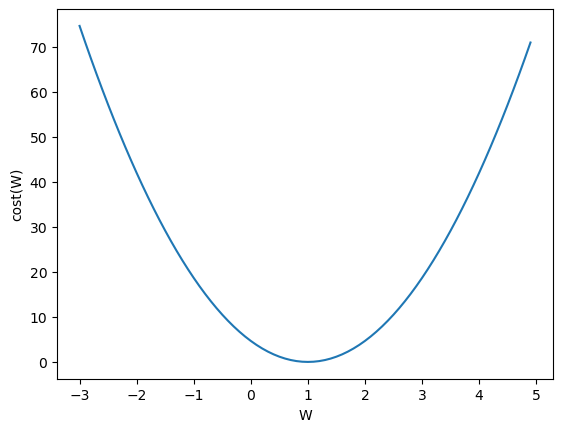

In [8]:
plt.plot(w_val, cost_val)
plt.ylabel('cost(W)')
plt.xlabel('W')
plt.show()

## 2. minimize algorithm 정의

In [9]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [10]:
w = tf.Variable(5.0)
b = tf.Variable(tf.random.normal([1], name="bias"))

In [11]:
@tf.function
def hypothesis(x):
    return w * x + b

In [12]:
@tf.function
def cost(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [13]:
@tf.function
def cost_func():
    y_pred = hypothesis(x_data)
    return cost(y_pred, y_data)

### 2-1. manually

In [14]:
# Minimize: Gradient Descent using derivative
@tf.function
def fit(x, y):
    learning_rate = 0.1
    gradient_b = tf.reduce_mean((w * x + b) - y)
    descent_b = b - learning_rate * gradient_b
    
    gradient_w = tf.reduce_mean(((w * x + b) - y) * x)
    descent_w = w - learning_rate * gradient_w
    
    b.assign(descent_b)
    w.assign(descent_w)

In [17]:
for step in range(200):
    fit(x_data, y_data)
    if step % 5 == 0:
        print(step, cost(hypothesis(x_data), y_data).numpy(), w.numpy(), b.numpy())

2023-03-12 01:57:23.624153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 01:57:23.646537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 01:57:23.652437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0 1.33895155e-05 1.0042498 [-0.00966099]
5 1.1864026e-05 1.0040005 [-0.00909417]
10 1.0512874e-05 1.0037658 [-0.00856059]
15 9.315476e-06 1.0035448 [-0.00805833]
20 8.254516e-06 1.0033369 [-0.00758552]
25 7.3144524e-06 1.0031412 [-0.00714046]
30 6.4814026e-06 1.0029569 [-0.00672157]
35 5.7433863e-06 1.0027834 [-0.00632724]
40 5.089063e-06 1.0026201 [-0.00595604]
45 4.5094657e-06 1.0024663 [-0.00560662]
50 3.9955903e-06 1.0023216 [-0.00527764]
55 3.5406256e-06 1.0021853 [-0.00496796]
60 3.1375291e-06 1.0020572 [-0.00467645]
65 2.7797646e-06 1.0019364 [-0.00440207]
70 2.463185e-06 1.0018228 [-0.00414377]
75 2.1825433e-06 1.001716 [-0.00390066]
80 1.9341892e-06 1.0016153 [-0.00367187]
85 1.7138267e-06 1.0015205 [-0.00345643]
90 1.5185758e-06 1.0014312 [-0.00325363]
95 1.345662e-06 1.0013473 [-0.00306275]
100 1.1923621e-06 1.0012683 [-0.00288304]
105 1.0565439e-06 1.0011939 [-0.00271391]
110 9.3622197e-07 1.0011238 [-0.0025547]
115 8.296796e-07 1.0010579 [-0.00240481]
120 7.3513763e-07 1.0

### 2-2. optimizer

In [15]:
optimizer = tf.optimizers.SGD(learning_rate=0.1)

In [16]:
epochs = 200 #(or however many iterations you want it to run)

for step in range(epochs):
    print(step, w.numpy(), b.numpy())
    optimizer.minimize(cost_func, [w, b], tape=tf.GradientTape())

0 5.0 [0.24383414]
1 1.1691326 [-1.4049327]
2 1.5732486 [-1.1915992]
3 1.5148563 [-1.1825788]
4 1.5073553 [-1.1520056]
5 1.4946259 [-1.1245465]
6 1.4827937 [-1.0974876]
7 1.4711813 [-1.0711075]
8 1.4598551 [-1.0453585]
9 1.4488004 [-1.0202289]
10 1.4380116 [-0.9957033]
11 1.4274821 [-0.9717673]
12 1.4172057 [-0.9484067]
13 1.4071764 [-0.9256076]
14 1.3973882 [-0.9033566]
15 1.3878353 [-0.88164055]
16 1.3785119 [-0.8604465]
17 1.3694128 [-0.839762]
18 1.3605323 [-0.81957465]
19 1.3518653 [-0.79987264]
20 1.3434068 [-0.78064424]
21 1.3351514 [-0.76187813]
22 1.3270947 [-0.74356306]
23 1.3192315 [-0.72568834]
24 1.3115574 [-0.70824325]
25 1.3040677 [-0.6912176]
26 1.2967582 [-0.6746012]
27 1.2896243 [-0.6583842]
28 1.2826619 [-0.6425571]
29 1.275867 [-0.6271104]
30 1.2692353 [-0.61203516]
31 1.262763 [-0.5973222]
32 1.2564465 [-0.582963]
33 1.2502816 [-0.568949]
34 1.2442651 [-0.5552718]
35 1.2383931 [-0.54192346]
36 1.2326622 [-0.528896]
37 1.2270693 [-0.51618165]
38 1.2216107 [-0.503773

2023-03-12 01:57:23.057340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-12 01:57:23.072398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


42 1.2010573 [-0.45705053]
43 1.1962241 [-0.44606334]
44 1.191507 [-0.43534032]
45 1.1869032 [-0.42487505]
46 1.1824102 [-0.41466135]
47 1.1780252 [-0.4046932]
48 1.1737456 [-0.39496464]
49 1.1695689 [-0.38546997]
50 1.1654927 [-0.37620354]
51 1.1615143 [-0.3671599]
52 1.1576316 [-0.35833365]
53 1.1538422 [-0.34971958]
54 1.150144 [-0.34131256]
55 1.1465347 [-0.33310762]
56 1.143012 [-0.32509997]
57 1.1395742 [-0.3172848]
58 1.1362188 [-0.3096575]
59 1.1329442 [-0.30221352]
60 1.1297483 [-0.29494852]
61 1.1266294 [-0.28785816]
62 1.1235852 [-0.28093827]
63 1.1206143 [-0.2741847]
64 1.1177149 [-0.26759347]
65 1.1148851 [-0.26116073]
66 1.1121233 [-0.25488263]
67 1.1094279 [-0.24875541]
68 1.1067973 [-0.2427755]
69 1.10423 [-0.23693934]
70 1.1017244 [-0.2312435]
71 1.099279 [-0.22568455]
72 1.0968924 [-0.22025926]
73 1.0945632 [-0.21496436]
74 1.0922899 [-0.20979679]
75 1.0900713 [-0.2047534]
76 1.0879061 [-0.19983126]
77 1.0857929 [-0.19502746]
78 1.0837306 [-0.19033912]
79 1.0817177 [-

### 2-3. opimizer customizing

In [25]:
# Get gradients
opt = tf.compat.v1.train.GradientDescentOptimizer(3.0)
grads_and_vars = opt.compute_gradients(cost_func, [w,b])

In [28]:
# Apply gradients
apply_gradients = opt.apply_gradients(grads_and_vars)

In [35]:
for step in range(200):
    if step % 5 == 0:
        print(step, w.numpy(), b.numpy())
        print(grads_and_vars)
        opt.apply_gradients(grads_and_vars)

0 1.000106 [-0.00024319]
[(<tf.Tensor: shape=(), dtype=float32, numpy=9.237943e-05>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.000106>), (<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00020924], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.00024319], dtype=float32)>)]
5 0.9998288 [0.00038452]
[(<tf.Tensor: shape=(), dtype=float32, numpy=9.237943e-05>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9998288>), (<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00020924], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.00038452], dtype=float32)>)]
10 0.99955165 [0.00101223]
[(<tf.Tensor: shape=(), dtype=float32, numpy=9.237943e-05>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.99955165>), (<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00020924], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.00101223], dtype=float32

## 3. Keras 예제

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 144ms/step - loss: 5.1271
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 2.3482


/Users/ridealist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2023-03-12 01:57:24.021648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0978
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5338
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2782
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1612
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1065
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0799
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0581
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0489
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0456
Epoch 14/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0428
Epoch 15/100
1/1 [==============================] - 0s 7ms/

2023-03-12 01:57:25.488368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


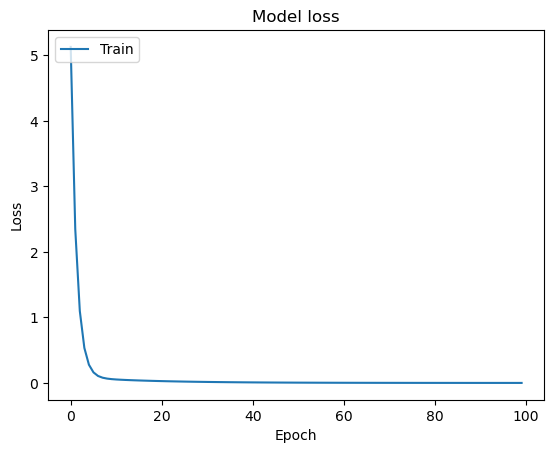

In [18]:
# Lab 3 Minimizing Cost
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

# fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()